# Pima Indians Diabetes Data Analysis

Context: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [147]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [148]:
indicators = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[indicators] = df[indicators].replace(0,np.nan)

df.isnull().sum()
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [149]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [150]:
df['High Pregnancies'] = df['Pregnancies'] > df.Pregnancies.mean()
df.groupby(['High Pregnancies'])['Outcome'].mean()

High Pregnancies
False    0.266509
True     0.450581
Name: Outcome, dtype: float64

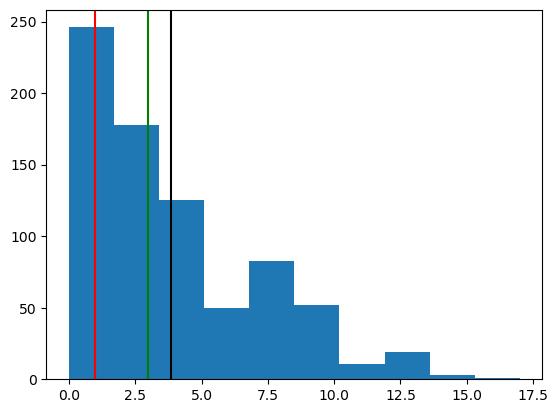

In [151]:
import matplotlib.pyplot as plt

plt.hist(df['Pregnancies'])
plt.axvline(x=df.Pregnancies.mean(), color='black')
plt.axvline(x=df.Pregnancies.mode()[0], color='red')
plt.axvline(x=df.Pregnancies.median(), color='green')

# Right Skew

<Axes: >

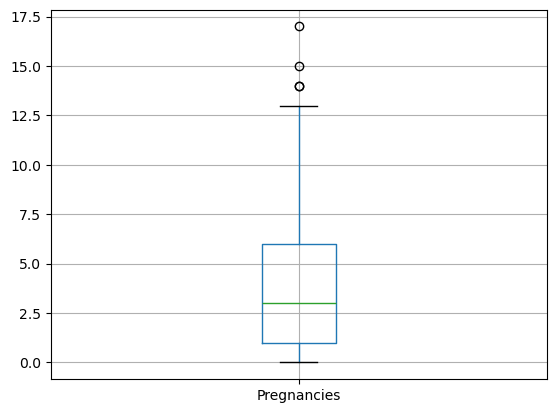

In [152]:
df.boxplot(column='Pregnancies')

In [153]:
df['High Glucose'] = df['Glucose'] > df.Glucose.mean()
df.groupby(['High Glucose'])['Outcome'].mean()

High Glucose
False    0.176471
True     0.562682
Name: Outcome, dtype: float64

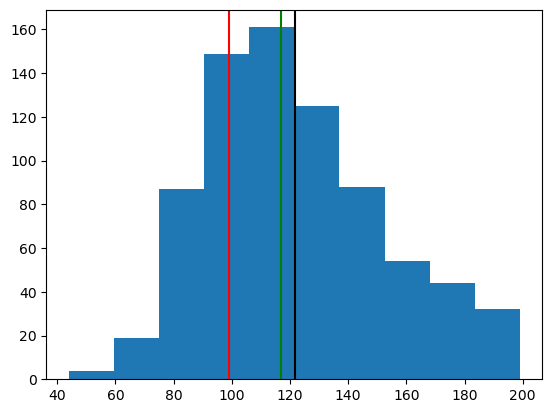

In [154]:
plt.hist(df['Glucose'])
plt.axvline(x=df.Glucose.mean(), color='black')
plt.axvline(x=df.Glucose.mode()[0], color='red')
plt.axvline(x=df.Glucose.median(), color='green')

<Axes: >

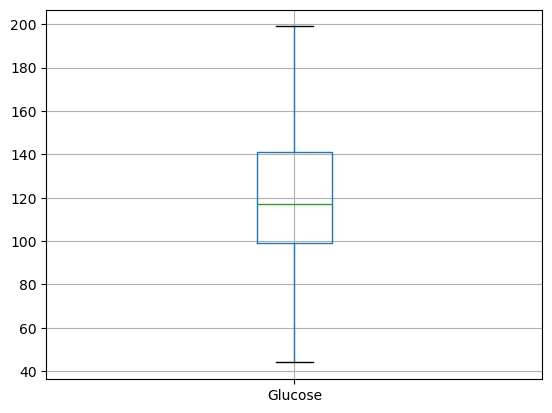

In [155]:
df.boxplot(column='Glucose')

In [156]:
df['High Blood Pressure'] = df['BloodPressure'] > df.BloodPressure.mean()
df.groupby(['High Blood Pressure'])['Outcome'].mean()

High Blood Pressure
False    0.298329
True     0.409742
Name: Outcome, dtype: float64

In [157]:
df['High Skin Thickness'] = df['SkinThickness'] > df.SkinThickness.mean()
df.groupby(['High Skin Thickness'])['Outcome'].mean()

High Skin Thickness
False    0.300199
True     0.441509
Name: Outcome, dtype: float64

In [158]:
df['High Insulin'] = df['Insulin'] > df.Insulin.mean()
df.groupby(['High Insulin'])['Outcome'].mean()

High Insulin
False    0.307568
True     0.523810
Name: Outcome, dtype: float64

In [159]:
df['High BMI'] = df['BMI'] > df.BMI.mean()
df.groupby(['High BMI'])['Outcome'].mean()

High BMI
False    0.239401
True     0.468665
Name: Outcome, dtype: float64

In [160]:
df['High Diabetes Pedigree'] = df['DiabetesPedigreeFunction'] > df.DiabetesPedigreeFunction.mean()
df.groupby(['High Diabetes Pedigree'])['Outcome'].mean()

High Diabetes Pedigree
False    0.293869
True     0.437288
Name: Outcome, dtype: float64

In [161]:
df['High Age'] = df['Age'] > df.Age.mean()
df.groupby(['High Age'])['Outcome'].mean()

High Age
False    0.257384
True     0.496599
Name: Outcome, dtype: float64